In [7]:
import seaborn as sns

from sentiment_analyzer import *

%load_ext autoreload
%autoreload 2
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Data ##

In [8]:
aapl_news = pd.read_csv('input/source_1/AppleNewsStock.csv')

msft_news = pd.read_csv('input/source_1/MicrosoftNewsStock.csv')
msft_news.drop(
    msft_news.columns[
        msft_news.columns.str.contains(
    'unnamed', case=False)],
    axis=1, inplace=True)

<Axes: xlabel='Date'>

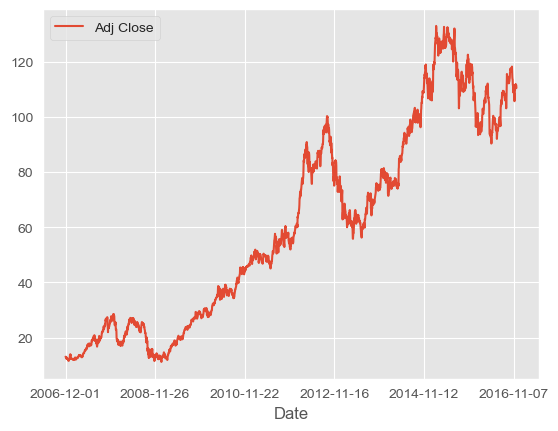

In [9]:
aapl_news.plot.line(y="Adj Close", x='Date')

<Axes: xlabel='Date'>

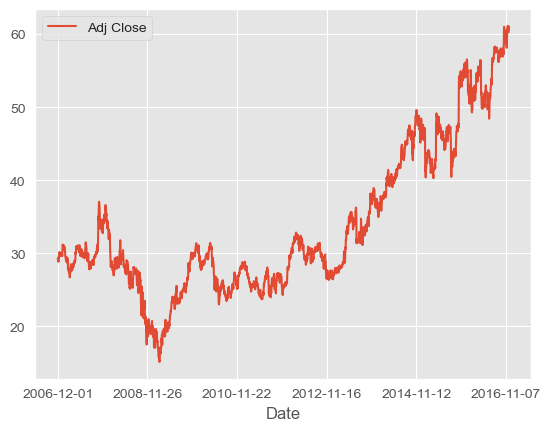

In [10]:
msft_news.plot.line(y="Adj Close", x='Date')

In [11]:
## aapl_news["Tomorrow"] = aapl_news["Adj Close"].shift(-1)
aapl_news["Tomorrow"] = (aapl_news["High"].shift(-1)+aapl_news["Low"].shift(-1))/2
## aapl_news["Target"] = (aapl_news["Tomorrow"] / aapl_news["Adj Close"]-1)
aapl_news["Target"] = (aapl_news["Tomorrow"] / ((aapl_news["High"]+aapl_news["Low"])/2) - 1)

## msft_news["Tomorrow"] = msft_news["Adj Close"].shift(-1)
msft_news["Tomorrow"] = (msft_news["High"].shift(-1)+msft_news["Low"].shift(-1))/2
##msft_news["Target"] = (msft_news["Tomorrow"] / msft_news["Adj Close"]-1)
msft_news["Target"] = (msft_news["Tomorrow"] / ((msft_news["High"]+msft_news["Low"])/2) - 1)

# Sentiment Analysis

### -Microsoft 

In [13]:
msft_result = get_results(msft_news,'News')

  0%|          | 0/2517 [00:00<?, ?it/s]

In [109]:
msft_check_prediction = check_prediction(msft_result,'Target','sentiment score', 0.06)

  0%|          | 0/2517 [00:00<?, ?it/s]

In [110]:
msft_check_prediction[['Target', 'sentiment score', 'predictions']]

,Target,sentiment score,predictions
0,0.008419,0.000000,1
1,-0.004430,0.000000,1
2,-0.007359,0.000000,1
3,-0.002069,0.000000,1
4,0.005529,0.000000,1
...,...,...,...
2512,-0.005686,0.999217,0
2513,0.004724,0.000000,1
2514,0.005774,0.000000,1
2515,-0.004347,0.000000,1


In [111]:
msft_prediction_accuracy = (sum((msft_check_prediction['predictions']))/len(msft_check_prediction.index))
msft_prediction_accuracy

0.7167262614223282

### -Apple

In [37]:
aapl_results = get_results(aapl_news,'News')

  0%|          | 0/2517 [00:00<?, ?it/s]

In [83]:
aapl_check_prediction = check_prediction(aapl_results,'Target','sentiment score', 0.06)

  0%|          | 0/2517 [00:00<?, ?it/s]

In [85]:
aapl_check_prediction[['Target', 'sentiment score', 'predictions']]

,Target,sentiment score,predictions
0,0.000658,0.000000,1
1,0.003561,0.000000,1
2,-0.011681,0.000000,1
3,-0.020214,0.000000,1
4,-0.005693,-1.000000,0
...,...,...,...
2512,0.004418,0.000000,1
2513,0.004667,0.628444,0
2514,-0.007862,0.000000,1
2515,0.001666,0.000000,1


In [86]:
aapl_prediction_accuracy = (sum((aapl_check_prediction['predictions']))/len(aapl_check_prediction.index))
aapl_prediction_accuracy

0.5490663488279698

# Combine and Compare #

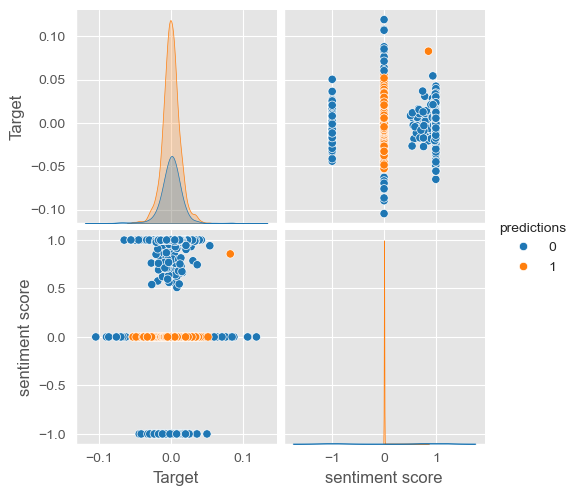

In [115]:
sns.pairplot(data=msft_check_prediction,
             vars=['Target','sentiment score'],
             hue='predictions',
             palette='tab10')
plt.show()

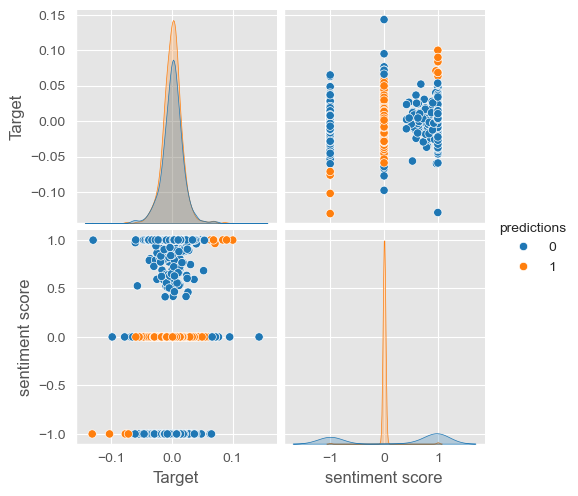

In [116]:
sns.pairplot(data=aapl_check_prediction,
             vars=['Target','sentiment score'],
             hue='predictions',
             palette='tab10')
plt.show()